### Convert pdf file to image file

In [1]:
!pip install pdf2image

In [2]:
!pip install PyMuPDF

In [3]:
import os
import fitz  # PyMuPDF

def pdf_to_images(pdf_file, output_dir):
    # Check if the output directory exists, create it if not
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    try:
        # Open the PDF file
        pdf_document = fitz.open(pdf_file)
        
        # Iterate over each page
        for i in range(len(pdf_document)):
            # Get the page
            page = pdf_document.load_page(i)
            
            # Render the page to a pixmap
            pixmap = page.get_pixmap()
            
            # Save the pixmap as an image
            image_path = os.path.join(output_dir, f"page_{i+1}.png")
            pixmap.save(image_path)
        
        print("PDF successfully converted to images.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Example usage
pdf_file = <File Path of your pdf document>
output_dir = <File path to save the image of your pdf document>
pdf_to_images(pdf_file, output_dir)

PDF successfully converted to images.


### Analyzing Invoice images using Amazon Textract AnalyzeExpense

Limitation of this API: This API can be only used for images and for objects/documents that are in S3 bucket.

In [4]:
!pip install amazon-textract-textractor

In [5]:
#!pip install textract==1.6.3

In [6]:
from textractor import Textractor
import os

# Set AWS credentials using environment variables
os.environ["AWS_ACCESS_KEY_ID"] = <Your AWS Access Key ID>
os.environ["AWS_SECRET_ACCESS_KEY"] = <Your AWS Secret Access Key>
# Initialize Textractor without passing credentials
extractor = Textractor(region_name="ap-southeast-1") <Mention your AWS region name>

document = extractor.analyze_expense(
    file_source=<Mention the file path of the image of your pdf document>,
    save_image=True,
)

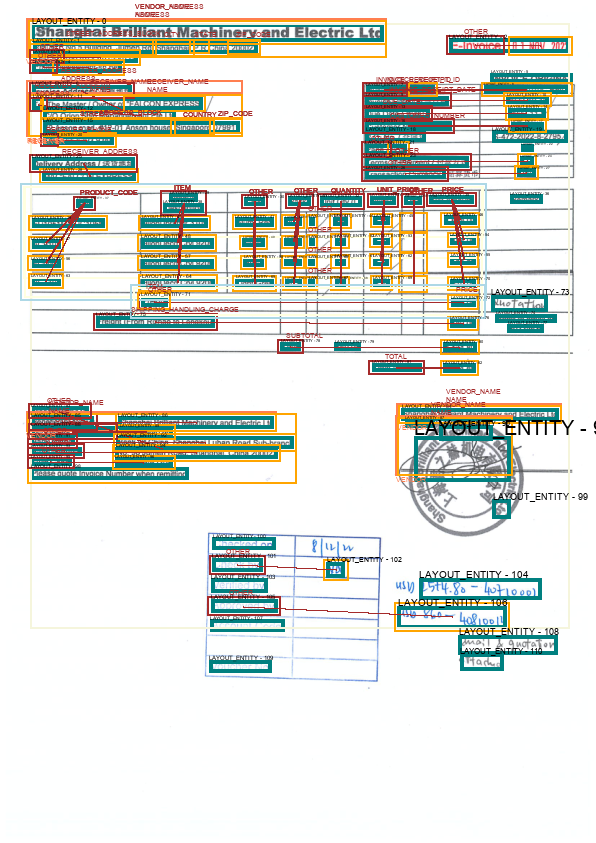

In [7]:
document.visualize(with_words=False)

In [8]:
document

This document holds the following data:
Pages - 1
Words - 246
Lines - 111
Key-values - 0
Checkboxes - 0
Tables - 0
Queries - 0
Signatures - 0
Identity Documents - 0
Expense Documents - 1

In [9]:
from textractor.data.constants import AnalyzeExpenseFields, AnalyzeExpenseFieldsGroup, AnalyzeExpenseLineItemFields

In [10]:
expense_doc = document.expense_documents[0]
expense_doc

Summary fields: 21
Line Item Groups:
index 1: 4 rowsindex 2: 1 row

In [11]:
expense_doc.summary_fields

ADDRESS:
    ADDRESS (Invoice Address / ****): To: The Master / Owner of "FALCON EXPRESS'\nC/O Orion Ship Management Pte Ltd\n72 Anson road, #12-01 Anson house Singapore 079911
    ADDRESS (To:): The Master / Owner of "FALCON EXPRESS'\nC/O Orion Ship Management Pte Ltd\n72 Anson road, #12-01 Anson house Singapore 079911
    ADDRESS: Shanghai Brilliant Machinery and Electric Ltd\nRm 301. No. 5 Building Jumen Rd. Shanghai, P R China 200023
STREET:
    STREET: 72 Anson road, #12-01 Anson house
    STREET: 72 Anson road, #12-01 Anson house
    STREET: Rm 301. No. 5 Building Jumen Rd.
ZIP_CODE:
    ZIP_CODE: 079911
    ZIP_CODE: 079911
    ZIP_CODE: 200023
COUNTRY:
    COUNTRY: Singapore
    COUNTRY: Singapore
NAME:
    NAME: "FALCON EXPRESS'
    NAME: The Master / Owner of "FALCON EXPRESS'
    NAME: Shanghai Brilliant Machinery and Electric Ltd
    NAME (Beneficiary Name): Shanghai Brilliant Machinery and Electric Ltd
    NAME: Shanghai Brilliant Machinery and Electric Ltd
    NAME: EBB2\n

In [12]:
expense_doc.summary_groups

RECEIVER: 
  ADDRESS (Invoice Address / ****): To: The Master / Owner of "FALCON EXPRESS'\nC/O Orion Ship Management Pte Ltd\n72 Anson road, #12-01 Anson house Singapore 079911
  STREET: 72 Anson road, #12-01 Anson house
  ZIP_CODE: 079911
  COUNTRY: Singapore
  NAME: "FALCON EXPRESS'
  NAME: The Master / Owner of "FALCON EXPRESS'
  ADDRESS_BLOCK: 72 Anson road, #12-01 Anson house Singapore 079911

  ADDRESS (To:): The Master / Owner of "FALCON EXPRESS'\nC/O Orion Ship Management Pte Ltd\n72 Anson road, #12-01 Anson house Singapore 079911
  STREET: 72 Anson road, #12-01 Anson house
  ZIP_CODE: 079911
  COUNTRY: Singapore
  ADDRESS_BLOCK: 72 Anson road, #12-01 Anson house Singapore 079911


VENDOR: 
  ADDRESS: Shanghai Brilliant Machinery and Electric Ltd\nRm 301. No. 5 Building Jumen Rd. Shanghai, P R China 200023
  STREET: Rm 301. No. 5 Building Jumen Rd.
  CITY: Shanghai,
  STATE: P R
  ZIP_CODE: 200023
  NAME: Shanghai Brilliant Machinery and Electric Ltd
  ADDRESS_BLOCK: Rm 301. No

In [13]:
expense_doc.line_items_groups

[|PRODUCT_CODE: EU1051M/EUC105M | ITEM: HilonUprimer 3105 | OTHER: Alum. Red | OTHER: 20.0 | OTHER: L | QUANTITY: 300 | UNIT_PRICE: 5.66 | OTHER:  | PRICE: 1,698.00 | EXPENSE_ROW: EU1051M/EUC105M HilonUprimer 3105 Alum. Red 20.0 L 300 5.66 1,698.00 | 
 |PRODUCT_CODE: AC9101 | ITEM: HilonDeco Cryl 9200 | OTHER: White | OTHER: 20.0 | OTHER: L | QUANTITY: 80 | UNIT_PRICE: 6.05 | OTHER:  | PRICE: 484.00 | EXPENSE_ROW: AC9101 HilonDeco Cryl 9200 White 20.0 L 80 6.05 484.00 | 
 |PRODUCT_CODE: AC9999 | ITEM: HilonDeco Cryl 9200 | OTHER: Black | OTHER: 20.0 | OTHER: L | QUANTITY: 40 | UNIT_PRICE: 4.57 | OTHER:  | PRICE: 182.80 | EXPENSE_ROW: AC9999 HilonDeco Cryl 9200 Black 20.0 L 40 4.57 182.80 | 
 |PRODUCT_CODE: AC7101 | ITEM: HilonDeco Cry(9200 | OTHER: Light Grey | OTHER: 20.0 | OTHER: L | QUANTITY: 40 | UNIT_PRICE: 5.25 | OTHER:  | PRICE: 210.00 | EXPENSE_ROW: AC7101 HilonDeco Cry(9200 Light Grey 20.0 L 40 5.25 210.00 | ,
 |ITEM: Freight | PRICE: 180.00 | EXPENSE_ROW: Freight 180.00 | ]

In [14]:
expense_doc.line_items_groups[0].to_pandas()

,ITEM,PRICE,PRODUCT_CODE,QUANTITY,UNIT_PRICE,OTHER
0,HilonUprimer 3105,"1,698.00",EU1051M/EUC105M,300,5.66,
1,HilonDeco Cryl 9200,484.00,AC9101,80,6.05,
2,HilonDeco Cryl 9200,182.80,AC9999,40,4.57,
3,HilonDeco Cry(9200,210.00,AC7101,40,5.25,
